## Final Project Submission

* Student name: Kregg Jackson
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://dev.to/kreggthegoat/data-science-effect-on-professional-sports-3j38


# Phase 1 Project: Movie Data Analysis
## Project Goal
This project is designed to use exploratory data analysis to generate insights for a business stakeholder


In [1]:
#Imports
import csv
import zipfile
import gzip
import os,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading csv files and converting them to pandas

In [2]:
#assign data frame folder
folder = "/Users/kregg/dsc-phase-1-project/zippedData/"
os.listdir(folder)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
f"{folder}*.csv*"

'/Users/kregg/dsc-phase-1-project/zippedData/*.csv*'

In [4]:
files = glob.glob(f"{folder}*.csv*")
files

['/Users/kregg/dsc-phase-1-project/zippedData/imdb.title.crew.csv.gz',
 '/Users/kregg/dsc-phase-1-project/zippedData/tmdb.movies.csv.gz',
 '/Users/kregg/dsc-phase-1-project/zippedData/imdb.title.akas.csv.gz',
 '/Users/kregg/dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz',
 '/Users/kregg/dsc-phase-1-project/zippedData/imdb.name.basics.csv.gz',
 '/Users/kregg/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz',
 '/Users/kregg/dsc-phase-1-project/zippedData/tn.movie_budgets.csv.gz',
 '/Users/kregg/dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz',
 '/Users/kregg/dsc-phase-1-project/zippedData/imdb.title.principals.csv.gz']

In [5]:
#clean file names and print data frames
tables = {}
dashes='---'*25

for file in files:
    table_name = file.replace('.csv.gz' , '').split('/')[-1].replace('.','_')
    print(dashes)
    
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(10))
    print()

---------------------------------------------------------------------------
Preview of imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
5,tt0879859,nm2416460,NaN
6,tt0996958,nm2286991,"nm2286991,nm2651190"
7,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684"
8,tt10003792,nm10539228,nm10539228
9,tt10005130,nm10540239,"nm5482263,nm10540239"



---------------------------------------------------------------------------
Preview of tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635



---------------------------------------------------------------------------
Preview of imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148



---------------------------------------------------------------------------
Preview of imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous","tt0404826,tt0111756,tt0367027,tt1492842"



---------------------------------------------------------------------------
Preview of imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography



---------------------------------------------------------------------------
Preview of tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"



---------------------------------------------------------------------------
Preview of bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010



---------------------------------------------------------------------------
Preview of imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [6]:
tn_movie_budgets = pd.read_csv('/Users/kregg/dsc-phase-1-project/zippedData/tn.movie_budgets.csv.gz' , index_col=0)

## Cleaning data frames

In [7]:
tn_movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [8]:
tmdb_movies = pd.read_csv('/Users/kregg/dsc-phase-1-project/zippedData/tmdb.movies.csv.gz', index_col=0)

In [9]:
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [10]:
bom_movie_gross = pd.read_csv('/Users/kregg/dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz')

In [11]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
tmdb_movies.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [13]:
tn_movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [14]:
#convert release_date column from a string to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

In [15]:
tn_movie_budgets.dtypes

release_date         datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
dtype: object

In [16]:
#remove $ from tn_movie_budgets numbers in order to convert str to float
tn_movie_budgets[tn_movie_budgets.columns[2:]] = tn_movie_budgets[tn_movie_budgets.columns[2:]].replace('[\$,]', '', regex=True).astype(int)

In [17]:
#remove nan from bom df
nan_df = bom_movie_gross[bom_movie_gross.isna().any(axis=1)]
nan_df.head()
bom_movie_gross = bom_movie_gross.dropna(how = 'any') 

## Add net profit column to tn_movie_budgets. 
### Task 1:
Find best months to release movies.

In [18]:
#add a profit column by subtracting gross from the budget
tn_movie_budgets['net_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [19]:
#add column just for the month each movie was released
tn_movie_budgets['release_month'] = tn_movie_budgets['release_date'].dt.month
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,release_month
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,6
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12


In [20]:
#group a new df on release month column
tn_movie_budgetsplot = tn_movie_budgets.groupby(['release_month']).sum()
tn_movie_budgetsplot.head(12)

,production_budget,domestic_gross,worldwide_gross,net_profit
release_month,,,,
1,7232691000,8310517342,16157646936,8924955936
2,10994196247,13882543926,28045454121,17051257874
3,14467577021,18129303397,37897684431,23430107410
4,10806485000,12407092932,27203797390,16397312390
5,19184024596,27146065077,66043077615,46859053019
6,20644478311,31531570976,68268531657,47624053346
7,18720308775,26720337439,62023990453,43303681678
8,12675822719,15955429870,30245291880,17569469161
9,10753760847,11412894262,23019987786,12266226939


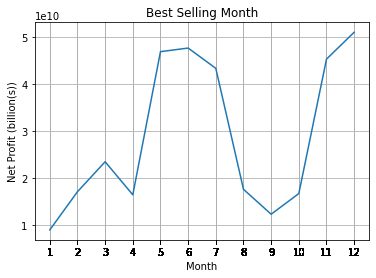

In [21]:
#plot tn_movie_budgetsplot
plt.plot(tn_movie_budgetsplot['net_profit'])
plt.xticks(tn_movie_budgets['release_month'])
plt.title('Best Selling Month')
plt.xlabel("Month")
plt.ylabel('Net Profit (billion(s))')
plt.grid()
plt.show()

The studio's goal is to make money on their investment I reccommend they should release when there are the most people going to the theaters. According to the graph the time when the most people are going to movie releases is December, November, or June based on the data in tmdb_movie_budgets. Obviously making a fun and entertaining film will be crucial for this step because there will be competition but this is when the studio has the best chance to sell the most tickets.

### Task 2:
Find how much the budget is related to gross.

In [22]:
tn_movie_budgets.corr()

,production_budget,domestic_gross,worldwide_gross,net_profit,release_month
production_budget,1.000000,0.685682,0.748306,0.608752,0.022575
domestic_gross,0.685682,1.000000,0.938853,0.926605,0.028034
worldwide_gross,0.748306,0.938853,1.000000,0.981811,0.030288
net_profit,0.608752,0.926605,0.981811,1.000000,0.029763
release_month,0.022575,0.028034,0.030288,0.029763,1.000000


In [23]:
#test correltion
from scipy import stats
r, p = stats.pearsonr(tn_movie_budgets.production_budget, tn_movie_budgets.net_profit)
print(round(r, 4))
print(round(p, 10))

0.6088
0.0


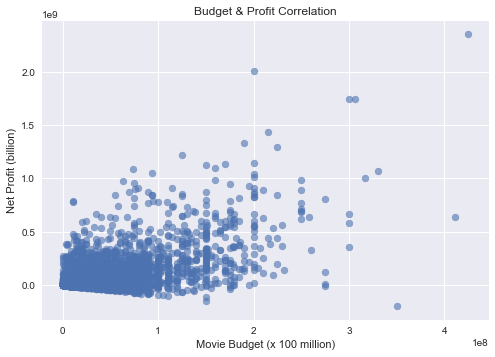

In [24]:
# graph scatterplot of tn_movie_budgets to find gross correlation with budget
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')
plt.title('Budget & Profit Correlation')
plt.scatter(tn_movie_budgets.production_budget, tn_movie_budgets.net_profit, alpha =.6)
plt.xlabel('Movie Budget (x 100 million)')
plt.ylabel('Net Profit (billion)');

Across all the movies in the tn_movie_budgets data frame there is a Pearson correlation of approximately 0.61 between movie budget and profit. I advise the studio to spend aproximately half of the production budget on promoting the movie. The scatterplot shows net profit and movie budget are positively correlated. Based off the data I would also reccommend the studio invest at least 150 million dollars into the budget. On the graph the 150 million mark is the point where the number of net losses drops significantly. Spending over 150 million increases the liklihood of the movie being a success and make the studio money off their investment. All yhe scatterplot shows is twi factors are correlated not exactly why.

### Clean bom_movie_gross data frame
### Task 3:
Find the most effective film studios.

In [25]:
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [26]:
bom_movie_gross.loc[: ,'foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3275      1500000
3286       229000
3309       256000
3342         5200
3353        30000
Name: foreign_gross, Length: 2007, dtype: object

In [27]:
#remove '$' signs and commas 
pd.set_option('mode.chained_assignment', None)
bom_movie_gross[bom_movie_gross.columns[2:4]] = bom_movie_gross[bom_movie_gross.columns[2:4]].replace('[\$,]', '', regex=True).astype(float).astype(int)

Add worldwide_gross column to bom_movie df



In [28]:
bom_movie_gross['worldwide_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000


In [29]:
bom_movie_gross.describe()

,domestic_gross,foreign_gross,year,worldwide_gross
count,2.007000e+03,2.007000e+03,2007.000000,2.007000e+03
mean,4.701984e+07,7.579038e+07,2013.506228,1.228102e+08
std,8.162689e+07,1.381796e+08,2.597997,2.075562e+08
min,4.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,6.700000e+05,3.900000e+06,2011.000000,8.239000e+06
50%,1.670000e+07,1.940000e+07,2013.000000,4.240000e+07
75%,5.605000e+07,7.595000e+07,2016.000000,1.337500e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [30]:
#bom_movie_gross boxplot function
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.show()

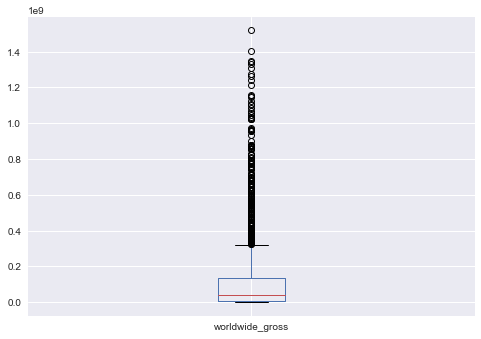

In [31]:
plot_boxplot(bom_movie_gross, 'worldwide_gross')

In [32]:
bom_movie_gross['studio'].value_counts()

Uni.    144
Fox     134
WB      130
Sony    105
BV      104
       ... 
LD        1
Rog.      1
KKM       1
Neon      1
CLS       1
Name: studio, Length: 172, dtype: int64

In [33]:
studio_grp = bom_movie_gross.groupby(['studio'])

In [34]:
gross_sum = studio_grp['worldwide_gross'].sum()

In [35]:
numtitles = studio_grp['title'].count()

In [36]:
#find each studios gross per title and add it to the data frame. Then make a new data frame grouped by studio
bom_studio_df = pd.concat([gross_sum, numtitles], axis = 'columns', sort=False)
bom_studio_df['gross_per_title'] = (bom_studio_df['worldwide_gross']/bom_studio_df['title'])
bom_studio_df.sort_values(by='gross_per_title', ascending=False, inplace=True)
bom_studio_df

,worldwide_gross,title,gross_per_title
studio,,,
HC,870300000,1,8.703000e+08
P/DW,5076500000,10,5.076500e+08
BV,44190383898,104,4.249075e+08
GrtIndia,254200000,1,2.542000e+08
WB,30791502998,130,2.368577e+08
...,...,...,...
Darin Southa,98400,1,9.840000e+04
ICir,79600,1,7.960000e+04
ITL,52900,1,5.290000e+04


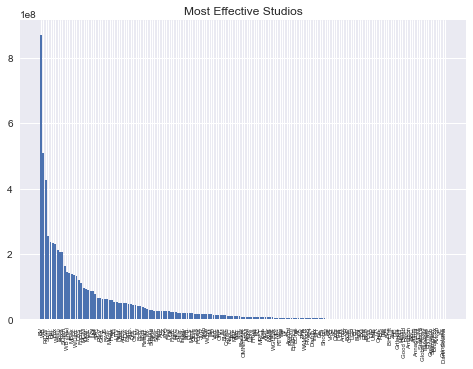

In [37]:
#All unique studios gross per film. Graph is cluttered and illegible need to restrict amount of data
unique_studios = bom_movie_gross['studio'].unique()
plt.title('Most Effective Studios')
plt.bar(unique_studios, bom_studio_df['gross_per_title'])
plt.xticks(unique_studios, rotation='vertical', size=6)
plt.show()

In [38]:
#make new df only with films that grossed more than $92,000,000 per title
bom_studio_plotdf = bom_studio_df.loc[bom_studio_df['gross_per_title'] > 92000000]
bom_studio_plotdf

,worldwide_gross,title,gross_per_title
studio,,,
HC,870300000,1,8.703000e+08
P/DW,5076500000,10,5.076500e+08
BV,44190383898,104,4.249075e+08
GrtIndia,254200000,1,2.542000e+08
WB,30791502998,130,2.368577e+08
WB (NL),10314099999,44,2.344114e+08
Fox,30980366596,134,2.311968e+08
Sony,22404715096,105,2.133782e+08
Par.,19444197697,94,2.068532e+08


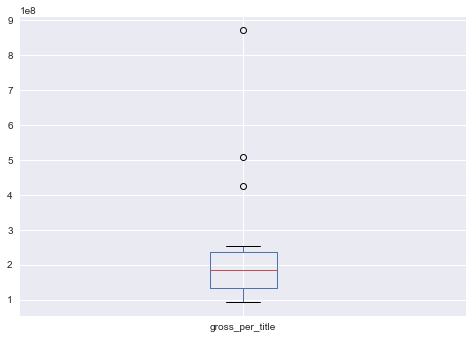

In [39]:
#boxplot new bom_studio_plotdf
bom_studio_plotdf.boxplot(column=['gross_per_title'])
plt.show()

In [40]:
#convert gross per title to int
bom_studio_df['gross_per_title']=bom_studio_df['gross_per_title'].astype(int)

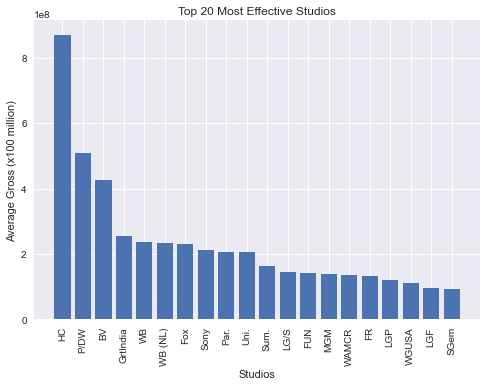

In [41]:
#bar plot of top 20 most effective studios
plt.bar(bom_studio_plotdf.index, bom_studio_plotdf['gross_per_title'])
plt.xticks(bom_studio_plotdf.index, rotation='vertical', size=10)
plt.title('Top 20 Most Effective Studios')
plt.xlabel('Studios')
plt.ylabel('Average Gross (x100 million)')
plt.show()

These are the 20 studios who made the most per film. The studio's goal is to produce a high grossing box office hit. Since this is the companies first time making a film I would suggest collaborating with one of the studios who have experience making high grossing films in order to lower the risk of a failure. These studios will also likely have a preexisting library of major titles with lucrative potential.  

# Conclusion

This analysis leads to three recommendations for improving likelihod of box office success for the production company:

* December, November, and June are the best months for movie sales. I believe those months are the best time to release a film.
* Worldwide gross and movie budget are positively correlated and a higher budget often translates in a higher grossing movie
* The studios who gross the most per film may be a valuable partner in a movie collaboration

### Next Steps

Additional analysis could provide further insights into how to improve likelihood of box office success.

* Could help to add more movie data. I am assuming the studio is willing to invest heavily in their debut film so more data on high grossing films could help pinpoint characteristics of successful films.
* Add more genre data because there is only one genre column. More genre information could help lead to detailed characteristics of the best selling genres.
* With more time the ratings data could be further analyzed. Analysts could calculate how much ratings correlate with profit and find what factors lead to a high rated movie.